<a href="https://colab.research.google.com/github/AlexaDestroyer/Analise_de_dados/blob/main/Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
#Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Carregando os dados
uri= 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
dados = pd.read_csv(uri)

In [131]:
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [132]:
#Renomeando Colunas
a_renomear = {
    'expected_hours': 'horas_esperadas',
    'price': 'preco',
    'unfinished': 'nao_finalizado'
}
dados = dados.rename(columns=a_renomear)

In [133]:
dados.head(2)

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015


In [134]:
# Adequando as features para evitar erros na interpretação de 0 ou 1 para trabalho com mapeamento de valores
troca = {0:1, 1:0}

dados['finalizado'] = dados.nao_finalizado.map(troca)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [135]:
dados.tail()

,nao_finalizado,horas_esperadas,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


<Axes: xlabel='horas_esperadas', ylabel='preco'>

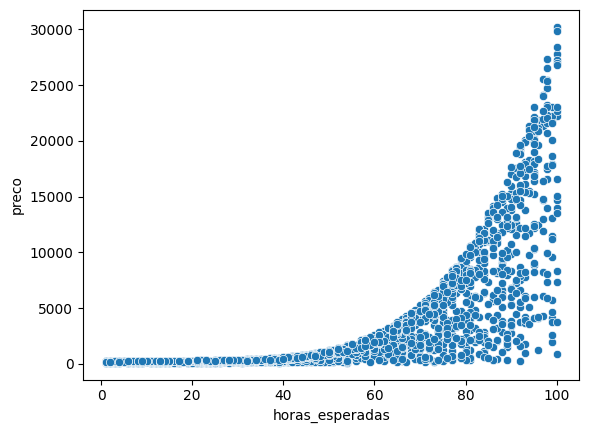

In [136]:
#Visualizando a relação entre preços e horas esperadas
sns.scatterplot(x="horas_esperadas", y="preco", data=dados)

<Axes: xlabel='horas_esperadas', ylabel='preco'>

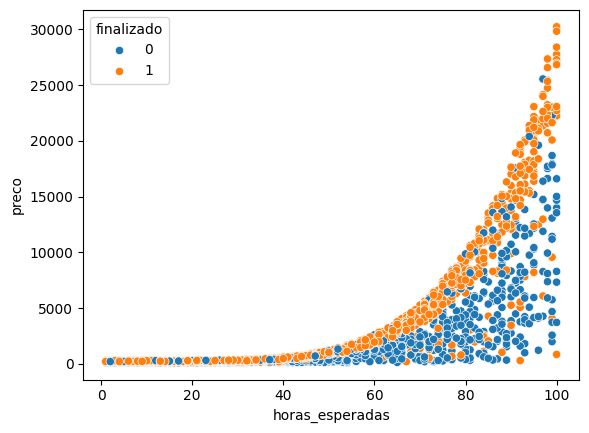

In [137]:
#Visualizando se os projetos que foram fechados ou não
sns.scatterplot(x="horas_esperadas", y="preco", hue="finalizado", data=dados)

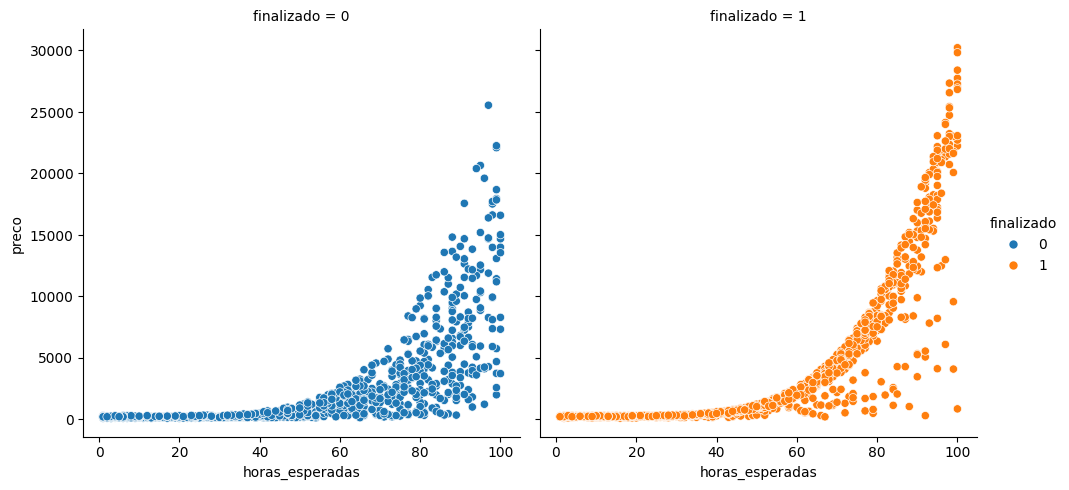

In [138]:
#Fechamento dos projetos 0==N 1==S
sns.relplot(x="horas_esperadas", y="preco", hue="finalizado", col="finalizado", data=dados)

In [139]:
#Iniciando a modelagem
#separando as variaveis x e y

x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

In [140]:
#Utilizando o estimador Linear SVC
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC  #utilizando Linear SCV
from sklearn.metrics import accuracy_score

SEED = 8
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC() #Utilizando Linear SVC
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 51.11%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [141]:

previsoes_linha_base = np.ones(540)
acuracia = accuracy_score(teste_y, previsoes_linha_base) * 100
print("A acurácia da previsão de base foi %.2f%%" % acuracia)

A acurácia da previsão de base foi 52.59%


Os dois modelos resultaram em uma acurácia não satisfatória. 😓

<Axes: xlabel='horas_esperadas', ylabel='preco'>

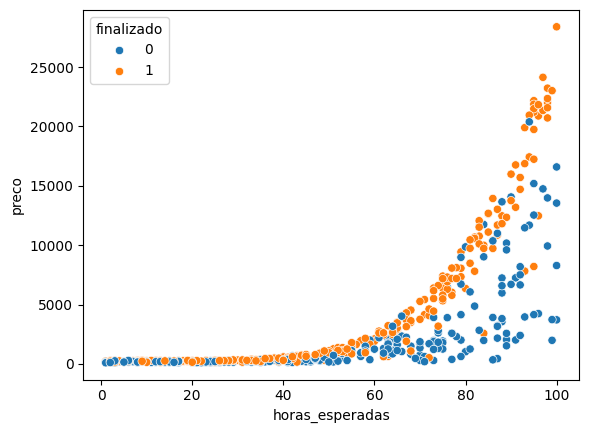

In [142]:
#Analisando as classificações realizadas usando as variaveis  de testes
sns.scatterplot(x="horas_esperadas", y="preco", hue=teste_y, data=teste_x)

Observamos que os testes estão seguindo o mesmo padrão. O algoritmo deve ser capaz de aprender a curva ascendente que vemos no gráfico, ou seja quanto maior o valor maior será o tempo de elaboração e também maior a chance do projeto ser concluído. Vamos trabalhar com matrizes em 2D para ajudar a compreensão do problema.

In [143]:
x_min = teste_x.horas_esperadas.min() #coletaremos o valor mínimo e máximo para horas_esperadas
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
print(x_min, x_max,y_min,y_max) #resultando em valores minimos a maximo(range)
# x está indo de 1 a 100, enquanto y varia entre 101 a 27738

1 100 101 28398


In [144]:
pixels = 100
np.arange(x_min, x_max, (x_max - x_min)/pixels) #método arange da biblioteca Numpy
#como resultado está partindo de 1 e foram realizadas somas de 0.99 até chegar ao número 99.01

array([ 1.  ,  1.99,  2.98,  3.97,  4.96,  5.95,  6.94,  7.93,  8.92,
        9.91, 10.9 , 11.89, 12.88, 13.87, 14.86, 15.85, 16.84, 17.83,
       18.82, 19.81, 20.8 , 21.79, 22.78, 23.77, 24.76, 25.75, 26.74,
       27.73, 28.72, 29.71, 30.7 , 31.69, 32.68, 33.67, 34.66, 35.65,
       36.64, 37.63, 38.62, 39.61, 40.6 , 41.59, 42.58, 43.57, 44.56,
       45.55, 46.54, 47.53, 48.52, 49.51, 50.5 , 51.49, 52.48, 53.47,
       54.46, 55.45, 56.44, 57.43, 58.42, 59.41, 60.4 , 61.39, 62.38,
       63.37, 64.36, 65.35, 66.34, 67.33, 68.32, 69.31, 70.3 , 71.29,
       72.28, 73.27, 74.26, 75.25, 76.24, 77.23, 78.22, 79.21, 80.2 ,
       81.19, 82.18, 83.17, 84.16, 85.15, 86.14, 87.13, 88.12, 89.11,
       90.1 , 91.09, 92.08, 93.07, 94.06, 95.05, 96.04, 97.03, 98.02,
       99.01])

In [145]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/ pixels) #procedimento para X
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/ pixels) #procedimento para Y

In [146]:
xx, yy = np.meshgrid(eixo_x, eixo_y) #Esse método recebe como parâmetros o eixo_x e eixo_y, devolvendo o conteúdo: xx e yy

In [147]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
xx.ravel() #ravel irá concatenar os elemnetos

array([ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01])

In [148]:
#Faremos o mesmo procedimento para yy, e então concatenaremos xx e yy por meio de np.c_
#Ao executarmos o código veremos a concatenação, com os devidos pares em cada eixo.
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.811503e+04],
       [9.802000e+01, 2.811503e+04],
       [9.901000e+01, 2.811503e+04]])

In [149]:
#Previsão da variavel pontos
Z = modelo.predict(pontos)
Z.shape #Precisamos nos atentar para o formato (shape) do array, que é 10000, mas se analisarmos xx, verificaremos que suas dimensões são 100, 100


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


(10000,)

In [150]:
xx.shape #Verificando as dimensões de xx

(100, 100)

In [151]:
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

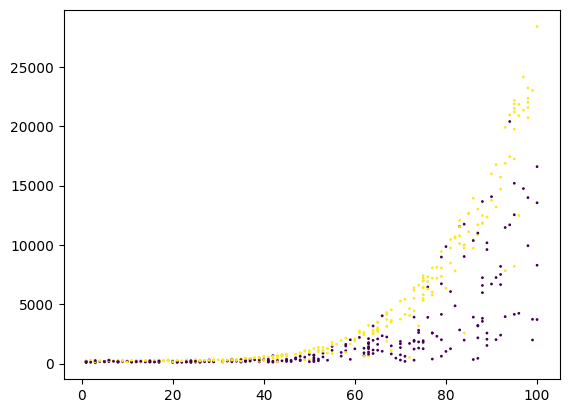

In [152]:
#Visualindo os dados
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

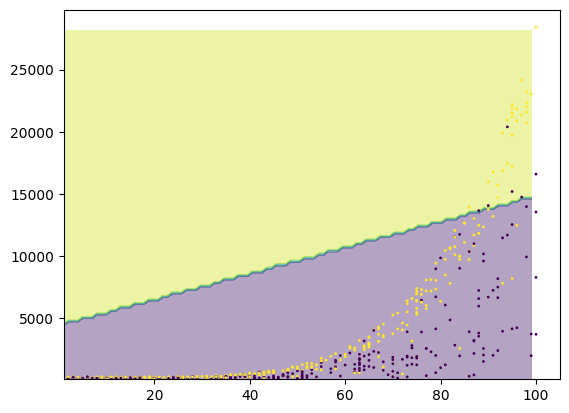

In [153]:
# BORDA DE DESCISÃO #
#estipulando cores para diferenciação no plot entre numeros0 e 1 e curva
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

 Percebemos que o relacionamento entre os projetos finalizados ou não finalizados estão representados por uma curva, e não uma reta.diante disso precisaremos modelar em outro estimador para chegar a um resultado mais satisfatório.

In [154]:
#Utilizando o estimador SVC
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  #utilizando  SVC
from sklearn.metrics import accuracy_score

SEED = 8
np.random.seed(SEED)
modelo = SVC(gamma='auto')
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = SVC()     #Utilizando SVC
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 54.07%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


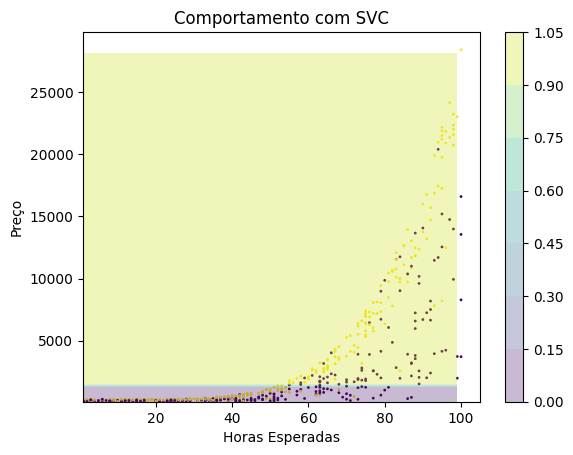

In [155]:
# Coletando os valores mínimo e máximo para 'horas_esperadas' e 'preco'
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

# Definindo a resolução dos pixels
pixels = 100

# Gerando os eixos x e y
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

# Criando a grade de pontos
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

# Fazendo a predição com o modelo SVC
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)  # Certifique-se de que Z tem o mesmo formato que xx e yy

# Plotando o comportamento
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.xlabel('Horas Esperadas')
plt.ylabel('Preço')
plt.title('Comportamento com SVC')
plt.colorbar()  # Adicionando a barra de cores
plt.show()


In [156]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 8
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)  #valor original, cru

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

 # Escalonando os valores
scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 71.30%


In [158]:
raw_treino_x

,horas_esperadas,preco
1984,19,281
1043,34,327
1648,48,756
1581,32,340
1101,23,243
...,...,...
1386,5,288
286,48,577
1065,20,248
800,81,3526


In [159]:
treino_x

array([[-1.10533423, -0.55931869],
       [-0.57721679, -0.55015711],
       [-0.08430718, -0.46471539],
       ...,
       [-1.0701264 , -0.56589113],
       [ 1.07755118,  0.08697124],
       [ 0.86630421, -0.23189168]])

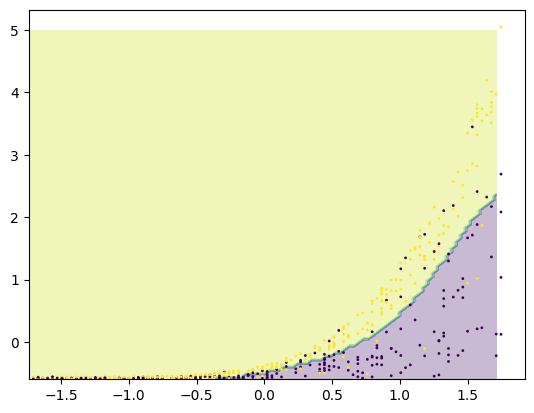

In [157]:
#Visualizando novo resultado
data_x = teste_x[:,0]  #linhas da coluna 0 do array
data_y = teste_x[:,1]  #linhas da coluna 1 do array

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=1)

Com o novo resultado a acurácia foi melhor e houve uma curva de aparendizado dos algorítimos.